<h1>TP Apprentissage Non Supervisé</h1>



### 1. Jeux de données

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import cluster
from scipy.io import arff
from sklearn import metrics
import kmedoids
import scipy . cluster . hierarchy as shc
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances


path = './clustering-benchmark-master/src/main/resources/datasets/artificial/'

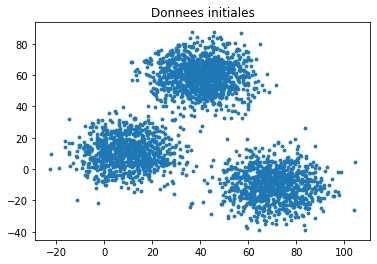

In [2]:
#Parser un fichier de donnees au format arff

databrut = arff.loadarff(open(path+"xclara.arff", 'r'))
data = [[x[0],x[1]] for x in databrut[0]]

#Affichage 2D
f0 = [f[0] for f in data]
f1 = [f[1] for f in data]

plt.scatter(f0,f1,s=8)
plt.title("Donnees initiales")
plt.show()

### 2. Clustering k-Means et k-Medoids 

#### 2.1 Pour démarrer

DATA : 

Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 2 : 0.542435069970526


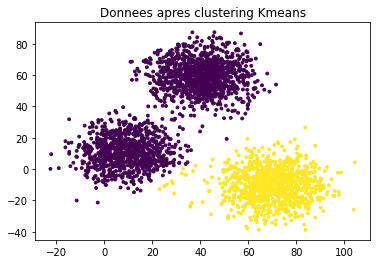

nv clusters = 2 , nb iter = 3 , ...... runtime =  99.94 ms
Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 3 : 0.6945587736089913
nv clusters = 3 , nb iter = 3 , ...... runtime =  37.0 ms
Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 4 : 0.5346427934296494
nv clusters = 4 , nb iter = 7 , ...... runtime =  31.0 ms
Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 5 : 0.40564355368999405
nv clusters = 5 , nb iter = 10 , ...... runtime =  51.0 ms


In [3]:
def k_means(data,f0,f1,k,plot=False):
    print("Appel KMeans pour une valeur fixee de k")
    tps1 = time.time()
    model = cluster.KMeans(n_clusters=k, init='k-means++')
    model.fit(data)
    tps2 = time.time()
    labels = model.labels_
    iteration = model.n_iter_
    
    print("Coefficient de silhouette pour k =",k,":",metrics.silhouette_score(data,labels))
    if(plot):
        plt.scatter(f0, f1, c=labels, s=8)
        plt.title("Donnees apres clustering Kmeans")
        plt.show()
    
    print("nv clusters =",k,", nb iter =", iteration,", ...... runtime = ", round((tps2-tps1)*1000,2),"ms")

print("DATA : \n")
    
for i in range(2,6):
    if(i == 2):
        k_means(data, f0,f1,i,True)
    else:
        k_means(data, f0,f1,i)

#### 2.2 Intérêts de la méthode k-Means  ( faire les questions )



DATA 2 : 

Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 2 : 0.5305545278224536


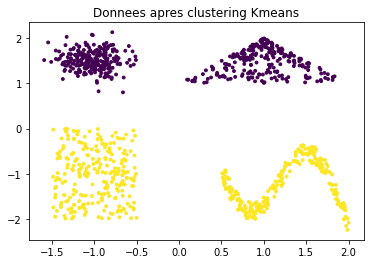

nv clusters = 2 , nb iter = 2 , ...... runtime =  25.93 ms
Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 3 : 0.5868172229463942
nv clusters = 3 , nb iter = 2 , ...... runtime =  35.0 ms
Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 4 : 0.6945464131654676
nv clusters = 4 , nb iter = 2 , ...... runtime =  33.0 ms
Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 5 : 0.6558465241094414
nv clusters = 5 , nb iter = 3 , ...... runtime =  38.0 ms


DATA 4 : 

Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 2 : 0.3887544903989402


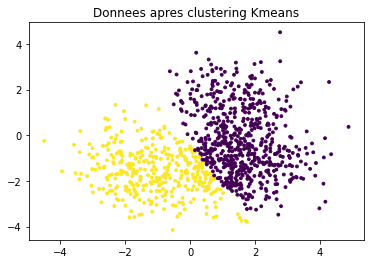

nv clusters = 2 , nb iter = 19 , ...... runtime =  43.0 ms
Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 3 : 0.42689889929224367
nv clusters = 3 , nb iter = 7 , ...... runtime =  41.0 ms
Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 4 : 0.3618854407142461
nv clusters = 4 , nb iter = 10 , ...... runtime =  54.0 ms
Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 5 : 0.3553395469575812
nv clusters = 5 , nb iter = 18 , ...... runtime =  59.0 ms


DATA 5 : 

Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 2 : 0.4602403628385199


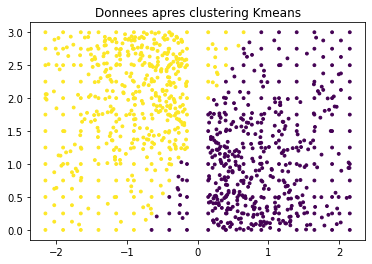

nv clusters = 2 , nb iter = 6 , ...... runtime =  33.0 ms
Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 3 : 0.4114008428558325
nv clusters = 3 , nb iter = 15 , ...... runtime =  42.0 ms
Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 4 : 0.4046180863678998
nv clusters = 4 , nb iter = 9 , ...... runtime =  45.0 ms
Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 5 : 0.38225456868997276
nv clusters = 5 , nb iter = 15 , ...... runtime =  51.0 ms


In [4]:
# Set de certains jeux de données pour voir les effets de la méthodes k-means 

databrut2 = arff.loadarff(open(path+"shapes.arff",'r'))
databrut4 = arff.loadarff(open(path+"threenorm.arff",'r'))
databrut5 = arff.loadarff(open(path+"wingnut.arff",'r'))

print("\n\nDATA 2 : \n")
data2 = [[x[0],x[1]] for x in databrut2[0]]
f0 = [f[0] for f in data2]
f1 = [f[1] for f in data2]

for i in range(2,6):
    if(i == 2):
        k_means(data2, f0,f1,i,True)
    else:
        k_means(data2, f0,f1,i)

print("\n\nDATA 4 : \n")
data4 = [[x[0],x[1]] for x in databrut4[0]]
f0 = [f[0] for f in data4]
f1 = [f[1] for f in data4]

for i in range(2,6):
    if(i == 2):
        k_means(data4, f0,f1,i,True)
    else:
        k_means(data4, f0,f1,i)

print("\n\nDATA 5 : \n")
        
data5 = [[x[0],x[1]] for x in databrut5[0]]
f0 = [f[0] for f in data5]
f1 = [f[1] for f in data5]

for i in range(2,6):
    if(i == 2):
        k_means(data5, f0,f1,i,True)
    else:
        k_means(data5, f0,f1,i)

- Nous avons 4 jeux de données pour chacun la valeur du nombre de clusters est différentes :
    * data : k = 3
    * data2 : k = 4
    * data4 : k = 3
    * data5 : k = 2

- les différentes valeurs de temps de calcul sont :
    * data : 29.77 ms
    * data2 : 33.09 ms
    * data4 : 42.23 ms
    * data5 : 20.25 ms

- On ne connait pas le résultat attendu donc on ne peux pas comparer. 

#### 2.3 Limites de la méthode k-Means

Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 2 : 0.35386038956048077


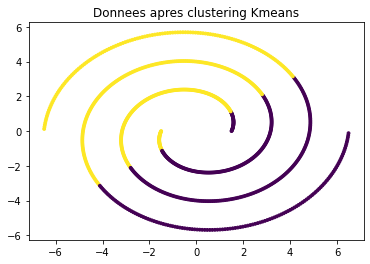

nv clusters = 2 , nb iter = 20 , ...... runtime =  45.0 ms
Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 3 : 0.3832762763585889


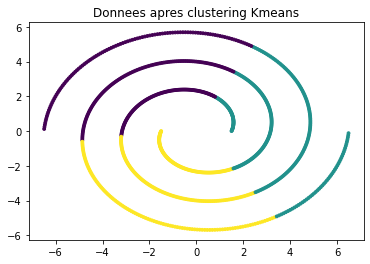

nv clusters = 3 , nb iter = 5 , ...... runtime =  44.0 ms
Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 4 : 0.38946809602714894


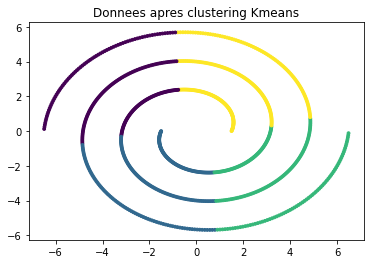

nv clusters = 4 , nb iter = 26 , ...... runtime =  106.0 ms
Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 5 : 0.35739935719111143


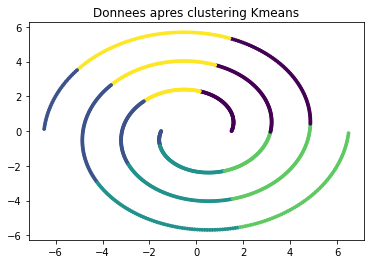

nv clusters = 5 , nb iter = 10 , ...... runtime =  54.0 ms
Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 2 : 0.49620937243675867


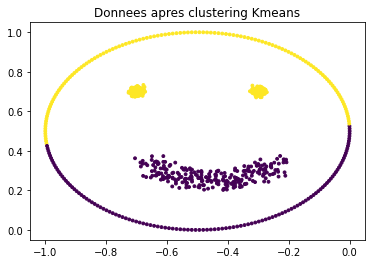

nv clusters = 2 , nb iter = 7 , ...... runtime =  38.98 ms
Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 3 : 0.6393006957752178


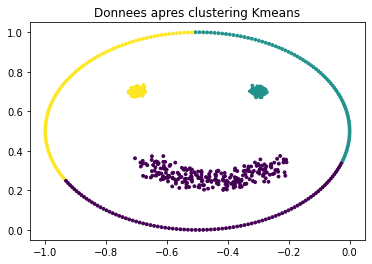

nv clusters = 3 , nb iter = 4 , ...... runtime =  47.0 ms
Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 4 : 0.6262905992435078


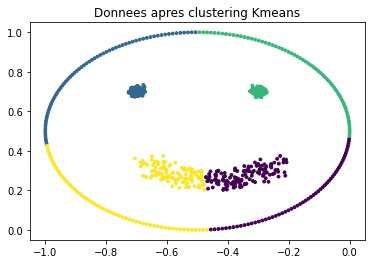

nv clusters = 4 , nb iter = 15 , ...... runtime =  56.0 ms
Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 5 : 0.6360419791642773


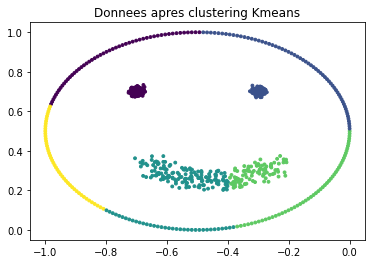

nv clusters = 5 , nb iter = 12 , ...... runtime =  58.0 ms
Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 2 : 0.5014915419364415


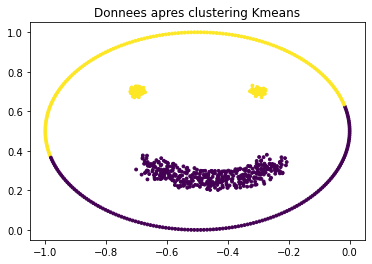

nv clusters = 2 , nb iter = 3 , ...... runtime =  33.0 ms
Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 3 : 0.575413002553207


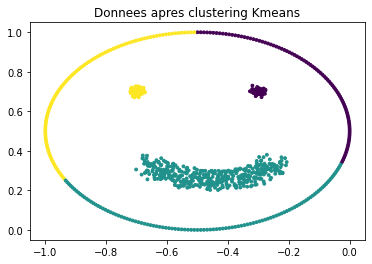

nv clusters = 3 , nb iter = 5 , ...... runtime =  41.0 ms
Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 4 : 0.5340698052624291


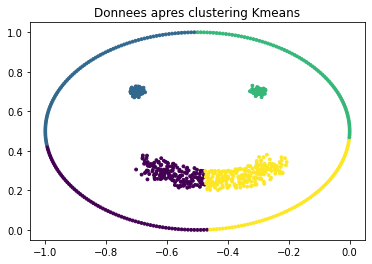

nv clusters = 4 , nb iter = 11 , ...... runtime =  47.0 ms
Appel KMeans pour une valeur fixee de k
Coefficient de silhouette pour k = 5 : 0.5404601943730004


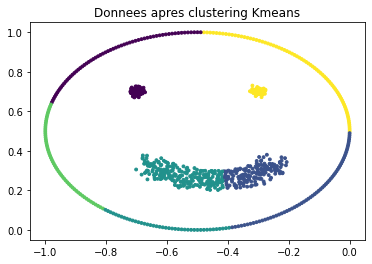

nv clusters = 5 , nb iter = 8 , ...... runtime =  52.0 ms


In [5]:
databrut3 = arff.loadarff(open(path+"spiral.arff",'r'))
data3 = [[x[0],x[1]] for x in databrut3[0]]
f0 = [f[0] for f in data3]
f1 = [f[1] for f in data3]

for i in range(2,6):
    k_means(data3,f0,f1,i, True)

databrut3 = arff.loadarff(open(path+"smile1.arff",'r'))
data3 = [[x[0],x[1]] for x in databrut3[0]]
f0 = [f[0] for f in data3]
f1 = [f[1] for f in data3]

for i in range(2,6):
    k_means(data3,f0,f1,i, True)
    
databrut3 = arff.loadarff(open(path+"smile2.arff",'r'))
data3 = [[x[0],x[1]] for x in databrut3[0]]
f0 = [f[0] for f in data3]
f1 = [f[1] for f in data3]

for i in range(2,6):
    k_means(data3,f0,f1,i, True)

- le clustering pour les données qui ont été choisis est ambigüe. Il ne semble pas vraiment preter attention aux clusters et sépare les différentes données par tranches. 

#### 2.4 Méthode k-medoids

In [6]:
def k_medoids(data,f0,f1, k, distance_function=euclidean_distances):
    tps1 = time.time()
    distmatrix = distance_function(data)
    fp = kmedoids.fasterpam(distmatrix, k)
    tps2 = time.time()
    iter_kmed = fp.n_iter
    labels_kmed = fp.labels
    print('Loss with FasterPAM:', fp.loss)
    
    print("Coefficient de silhouette pour k =",k,":",metrics.silhouette_score(data,labels_kmed))
    #plt.scatter(f0,f1, c=labels_kmed, s=8)
    #plt.title("Données apres clustering KMedoids")
    #plt.show()
    print(" nb clusters =",k,", nb_iter =",iter_kmed,", ...... runtime =", round((tps2-tps1)*1000,2),"ms")

databrut = arff.loadarff(open(path+"xclara.arff", 'r'))
data = [[x[0],x[1]] for x in databrut[0]]

#Affichage 2D
f0 = [f[0] for f in data]
f1 = [f[1] for f in data]

for i in range(2,10):
    k_medoids(data, f0,f1,i)

Loss with FasterPAM: 73582.16599336648
Coefficient de silhouette pour k = 2 : 0.5347384400282739
 nb clusters = 2 , nb_iter = 2 , ...... runtime = 175.93 ms
Loss with FasterPAM: 38029.6560504377
Coefficient de silhouette pour k = 3 : 0.6945587736089913
 nb clusters = 3 , nb_iter = 2 , ...... runtime = 178.6 ms
Loss with FasterPAM: 35282.44112521062
Coefficient de silhouette pour k = 4 : 0.5387488479142908
 nb clusters = 4 , nb_iter = 2 , ...... runtime = 174.0 ms
Loss with FasterPAM: 33052.14322115521
Coefficient de silhouette pour k = 5 : 0.4287119280734189
 nb clusters = 5 , nb_iter = 3 , ...... runtime = 198.91 ms
Loss with FasterPAM: 30579.705382209737
Coefficient de silhouette pour k = 6 : 0.3114752551724333
 nb clusters = 6 , nb_iter = 3 , ...... runtime = 191.0 ms
Loss with FasterPAM: 28673.079769833355
Coefficient de silhouette pour k = 7 : 0.3169095222254898
 nb clusters = 7 , nb_iter = 2 , ...... runtime = 164.0 ms
Loss with FasterPAM: 26788.641224957973
Coefficient de silhou

- le bon nombre de clusters permettant d'obtenir un coefficient de silhouette le plus proche de 1 est k = 3
- Le temps de calcul pour une telle execution est 100,12 ms
- Non, on ne connais pas le résultat attendu donc on ne peux pas comparer. 

In [7]:
def evaluation(data,f0,f1,k):
    
    # méthode K-means 
    model = cluster.KMeans(n_clusters=k, init='k-means++')
    model.fit(data)
    labels = model.labels_
    
    # méthode K-medoids
    distmatrix = euclidean_distances(data)
    fp = kmedoids.fasterpam(distmatrix, k)
    labels_kmed = fp.labels
    
    print("Similarity score of the data : \n\t- Rand_Score :",metrics.rand_score(labels,labels_kmed),"\n\t- Mutual_Info_Score :",metrics.mutual_info_score(labels,labels_kmed))
    

In [8]:
# Nous reprenons le premier dataset :

databrut = arff.loadarff(open(path+"xclara.arff", 'r'))
data = [[x[0],x[1]] for x in databrut[0]]

#Affichage 2D
f0 = [f[0] for f in data]
f1 = [f[1] for f in data]

evaluation(data,f0,f1,3)

Similarity score of the data : 
	- Rand_Score : 1.0 
	- Mutual_Info_Score : 1.0929325398637173


- Pour la valeur de k la plus pertinente dans les deux cas qui est 3 : Nous obtenons un rand_score de 1.0 qui traduit un perfect match et donc une répartition dans les différents clusters qui est la même. La valeur de mutual information, est de 1.09 légèrement différente qui peut se traduire par un échange entre certaines données des clusters. 

In [14]:
# Pour le même dataset que précedemment nous allons prendre une valeur de k différente et nous allons
# faire varier la distance prise en compte. 

databrut = arff.loadarff(open(path+"xclara.arff", 'r'))
data = [[x[0],x[1]] for x in databrut[0]]

#Affichage 2D
f0 = [f[0] for f in data]
f1 = [f[1] for f in data]

k_medoids(data,f0,f1, 3)
k_medoids(data,f0,f1, 3, manhattan_distances)

Loss with FasterPAM: 38029.6560504377
Coefficient de silhouette pour k = 3 : 0.6945587736089913
 nb clusters = 3 , nb_iter = 2 , ...... runtime = 144.0 ms
Loss with FasterPAM: 48584.764578748
Coefficient de silhouette pour k = 3 : 0.6943525902072846
 nb clusters = 3 , nb_iter = 2 , ...... runtime = 101.29 ms


- Au lieu d'utiliser la distance euclidienne nous avons opter pour la distance de manhattan on voit une légère dégradation au niveau du coefficient de silhouette pour un runtime qui est diminué de considérablement. Pour la faible diminution du coefficient de silhouette cela vaut le coup.

### 3. Clustering agglomératif

#### 3.1 Pour démarrer

 Dendrogramme ’ single ’ donnees initiales


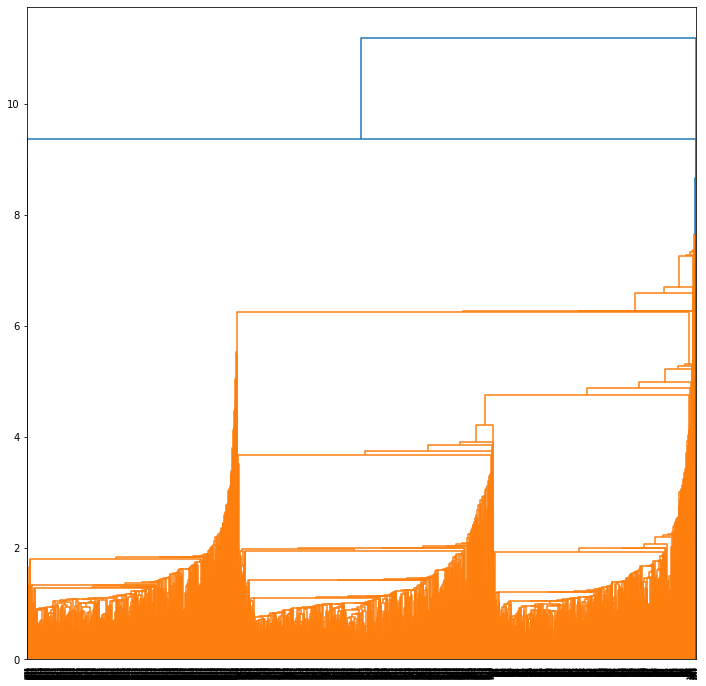

In [15]:
def print_dendrogramme(data):
    # Donnees dans datanp
    print (" Dendrogramme ’ single ’ donnees initiales")
    linked_mat = shc.linkage(data,'single')
    plt.figure(figsize = (12,12))
    shc.dendrogram(linked_mat,
    orientation = 'top',
    distance_sort = 'descending',
    show_leaf_counts = False)
    plt.show()
    

print_dendrogramme(data)

- code permettant de déterminer un clustering hiérarchique en utilisant soit une limite sur le seuil de distance soit un nombre de clusters.

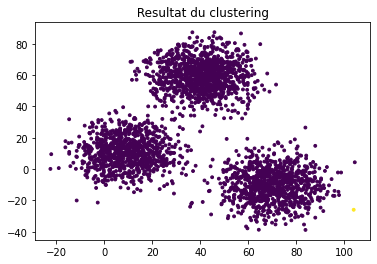

 nb clusters =  2  , nb feuilles =  3000  runtime =  63.6  ms 


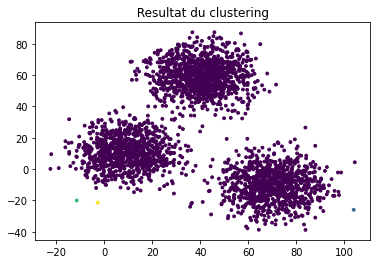

 nb clusters =  4  , nb feuilles =  3000  runtime =  61.68  ms 


In [14]:
def lim_cluster(data):
    # set distance_threshold ( 0 ensures we compute the full tree )
    tps1 = time.time()
    model = cluster.AgglomerativeClustering(distance_threshold = 10 , linkage = 'single' , n_clusters = None)
    model = model.fit(data)
    tps2 = time.time()
    labels = model.labels_
    k = model.n_clusters_
    leaves = model.n_leaves_
    # Affichage clustering
    plt.scatter(f0,f1,c = labels,s = 8 )
    plt.title(" Resultat du clustering ")
    plt.show()
    print(" nb clusters = ",k," , nb feuilles = ",leaves, " runtime = " ,round((tps2 - tps1) * 1000 , 2 ) ," ms " )

    #set the number of clusters 
    k = 4
    tps1 = time.time()
    model = cluster.AgglomerativeClustering(linkage = 'single' , n_clusters = k)
    model = model.fit(data)
    tps2 = time.time()
    
    labels = model.labels_
    k = model.n_clusters_
    leaves = model.n_leaves_
    # Affichage clustering
    plt.scatter(f0,f1,c = labels,s = 8 )
    plt.title(" Resultat du clustering ")
    plt.show()
    print(" nb clusters = ",k," , nb feuilles = ",leaves, " runtime = " ,round((tps2 - tps1) * 1000 , 2 ) ," ms " )
    
    
lim_cluster(data)

#### 3.2 Intérêts  de la méthode 

In [18]:
#choix des différents jeux de données

datab3 = arff.loadarff(open(path+"smile1.arff",'r'))
data3 = [[x[0],x[1]] for x in datab3[0]]
f2 = [f[0] for f in data3]
f3 = [f[1] for f in data3]

datab4 = arff.loadarff(open(path+"banana.arff",'r'))
data4 = [[x[0],x[1]] for x in datab4[0]]
f4 = [f[0] for f in data4]
f5 = [f[1] for f in data4]


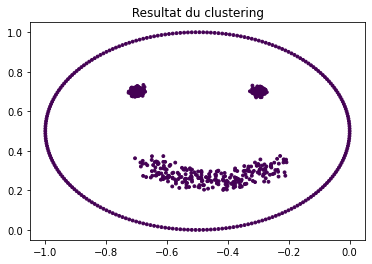

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [31]:
def set_distance(data,f0,f1, distance, plot=False):
    # set distance_threshold ( 0 ensures we compute the full tree )
    tps1 = time.time()
    model = cluster.AgglomerativeClustering(distance_threshold = distance , linkage = 'single' , n_clusters = None)
    model = model.fit(data)
    tps2 = time.time()
    labels = model.labels_
    k = model.n_clusters_
    leaves = model.n_leaves_
    
    # Affichage clustering
    if(plot):
        plt.scatter(f0,f1,c = labels,s = 8 )
        plt.title(" Resultat du clustering ")
        plt.show()
    print("Coefficient de silhouette pour distance =",distance,":",metrics.silhouette_score(data,labels,metric='euclidian'))
    print(" nb clusters = ",k," , nb feuilles = ",leaves, " runtime = " ,round((tps2 - tps1) * 1000 , 2 ) ," ms " , "for a distance of :", distance)

for i in range (1,10,1):
    if(i == 1): set_distance(data3,f2,f3,i,True)
    else : set_distance(data3,f2,f3,i)
        




- Pour le premier dataset qui a été choisi nour remarquons que la distance permettant d'avoir un runtime relativement faible est 8